# Ensemble Learning Part 2: Sequential Modeling with Boosting

Ensemble Learning, Boosting, Weak Learners, Bias Reduction, AdaBoost (Adaptive Boosting), Sample Weighting, Gradient Boosting, Residuals, Gradient Descent.


### **Objectives:**

* Students will understand the principle of **Boosting** as a sequential ensemble method that combines multiple "weak learners" into a single "strong learner" to reduce bias.
* Students will grasp the intuition behind **AdaBoost (Adaptive Boosting)** and how it iteratively re-weights data points to focus on difficult-to-classify examples.
* Students will understand the core idea of **Gradient Boosting**, where each new model is trained to predict and correct the *residual errors* of the preceding ensemble.
* Students will implement `AdaBoostClassifier` and `GradientBoostingClassifier` using `scikit-learn`.
* Students will visualize how the decision boundary of a boosted model evolves from a simple weak learner to a complex strong learner.
* Students will compare the performance of AdaBoost, Gradient Boosting, and other ensembles on a real-world dataset.



### **Setup: Install and Import Libraries**

In [1]:
# Install mlxtend for plotting decision boundaries
!pip install mlxtend xgboost -q

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import mlxtend
import xgboost as xgb # For the final task

# Scikit-learn for models, datasets, and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Import the models we will use
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

# MLxtend for visualizing decision regions
from mlxtend.plotting import plot_decision_regions

# Datasets for visualization and application
from sklearn.datasets import make_moons

# Set plot style for better aesthetics
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)


# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print(f"Scikit-learn Version: {sklearn.__version__}")
print(f"XGBoost Version: {xgb.__version__}")

Scikit-learn Version: 1.6.1
XGBoost Version: 3.0.4


### **Part 1: The Concept of Weak Learners**

Boosting is a powerful technique for converting a collection of **weak learners** into a single **strong learner**. A weak learner is a model that performs only slightly better than random chance. In practice, the most common weak learner for boosting is a shallow **Decision Tree**, often a "stump" (a tree with `max_depth=1`).

Let's visualize how poorly a single stump performs on a non-linear dataset, motivating the need for an ensemble approach.

--- Part 1: Visualizing a Weak Learner ---
Single Decision Stump Accuracy: 0.8200


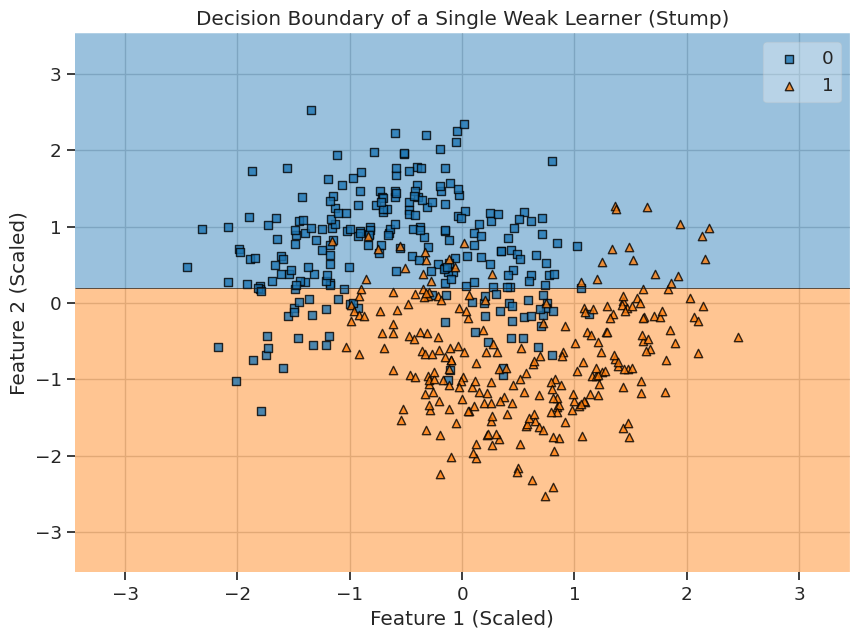

In [2]:
print("--- Part 1: Visualizing a Weak Learner ---")

# 1. Generate the make_moons dataset
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_scaled = StandardScaler().fit_transform(X)

# 2. Train a single Decision Stump (our weak learner)
weak_learner = DecisionTreeClassifier(max_depth=1, random_state=42)
weak_learner.fit(X_scaled, y)
y_pred_weak = weak_learner.predict(X_scaled)
weak_accuracy = accuracy_score(y, y_pred_weak)

print(f"Single Decision Stump Accuracy: {weak_accuracy:.4f}")

# 3. Visualize the decision boundary of the weak learner
plt.figure(figsize=(10, 7))
plot_decision_regions(X_scaled, y, clf=weak_learner)
plt.title('Decision Boundary of a Single Weak Learner (Stump)')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.show()

# INSIGHT: As expected, the single stump can only make one simple, linear cut. It performs poorly on this complex data.

### **Part 2: AdaBoost (Adaptive Boosting)**

AdaBoost was one of the first successful boosting algorithms. It works by building a sequence of weak learners, where each new learner pays more attention to the data points that were misclassified by the previous ones.

**The Process:**
1.  Train a weak learner on the data, where every point starts with an equal weight.
2.  **Adapt**: Increase the sample weight of the misclassified points and decrease the weight of the correctly classified points.
3.  Train the next weak learner on the re-weighted data. This forces it to focus on the "hard" examples.
4.  Repeat for a specified number of learners (`n_estimators`).
5.  The final prediction is a weighted vote of all learners, where models that performed better on their respective training stages get a higher say.


--- Part 2: Implementing AdaBoost ---
AdaBoost Ensemble Accuracy: 0.9320


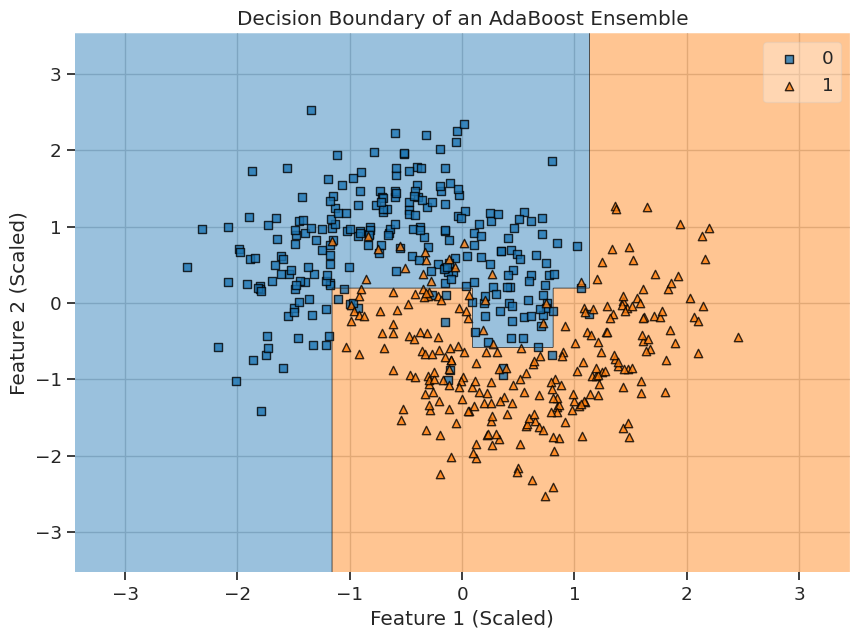

In [3]:
print("\n--- Part 2: Implementing AdaBoost ---")

# 1. Initialize and train an AdaBoostClassifier
# We use our Decision Stump as the base estimator.
adaboost_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
adaboost_clf.fit(X_scaled, y)
y_pred_ada = adaboost_clf.predict(X_scaled)
ada_accuracy = accuracy_score(y, y_pred_ada)

print(f"AdaBoost Ensemble Accuracy: {ada_accuracy:.4f}")

# 2. Visualize the AdaBoost decision boundary
plt.figure(figsize=(10, 7))
plot_decision_regions(X_scaled, y, clf=adaboost_clf)
plt.title('Decision Boundary of an AdaBoost Ensemble')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.show()

# INSIGHT: By combining 50 simple stumps, each focusing on the errors of the last, AdaBoost creates a
# highly complex and accurate non-linear decision boundary.

### **Part 3: Gradient Boosting**

**Gradient Boosting** is a more generalized and often more powerful boosting framework. Instead of adjusting the weights of data points, it fits each new model to the **errors** of the previous ensemble.

**The Process (Intuition):**
1.  Start with an initial simple prediction for all data points (e.g., the average).
2.  Calculate the **residuals** (the difference between the true values and the current prediction). These residuals represent the errors the ensemble is currently making.
3.  Train a new weak learner (typically a regression tree) to predict these residuals.
4.  Add the predictions of this new "error-correcting" tree to the overall ensemble prediction, scaled by a `learning_rate`.
5.  Repeat this process, with each new tree incrementally reducing the ensemble's error.

The `learning_rate` is a key hyperparameter that controls how big of a step each tree takes. A smaller learning rate requires more trees but often leads to better generalization.


--- Part 3: Implementing Gradient Boosting ---
Gradient Boosting Ensemble Accuracy: 0.9500


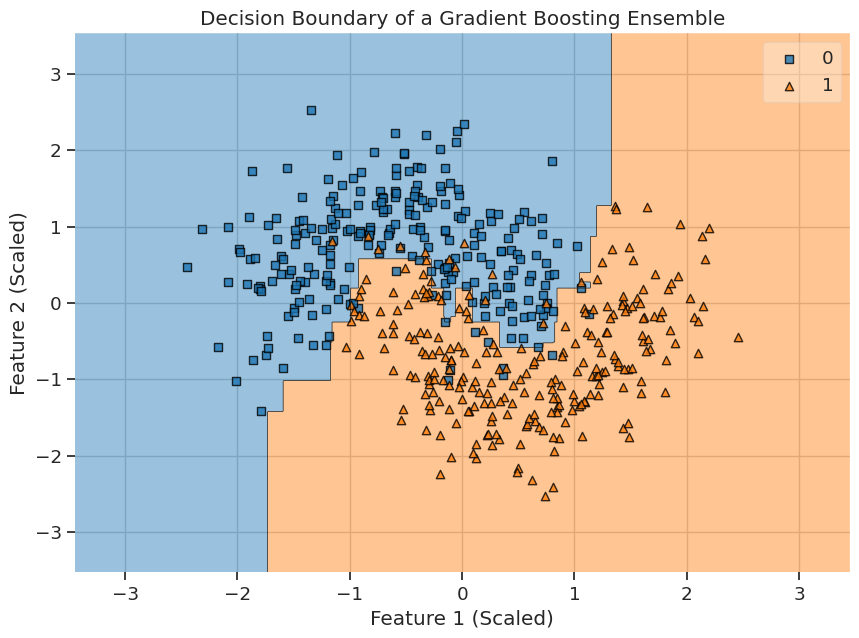

In [4]:
print("\n--- Part 3: Implementing Gradient Boosting ---")

# 1. Initialize and train a GradientBoostingClassifier
gradboost_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.5, # A higher learning rate for faster convergence on this simple dataset
    max_depth=1, # Using stumps as weak learners
    random_state=42
)
gradboost_clf.fit(X_scaled, y)
y_pred_gb = gradboost_clf.predict(X_scaled)
gb_accuracy = accuracy_score(y, y_pred_gb)

print(f"Gradient Boosting Ensemble Accuracy: {gb_accuracy:.4f}")

# 2. Visualize the Gradient Boosting decision boundary
plt.figure(figsize=(10, 7))
plot_decision_regions(X_scaled, y, clf=gradboost_clf)
plt.title('Decision Boundary of a Gradient Boosting Ensemble')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.show()

# INSIGHT: Gradient Boosting also creates an excellent decision boundary. It is often more powerful and flexible than AdaBoost.

### **Part 4: Application on a Real-World Dataset**

Now let's apply these powerful boosting models to the **Heart Disease dataset** from the previous lab and compare their performance against each other and against the Random Forest (a bagging model).

In [5]:
print("\n--- Part 4: Application on the Heart Disease Dataset ---")

# 1. Load and prepare the Heart Disease dataset (same as previous lab)
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, header=None, names=column_names, na_values='?')
df.dropna(inplace=True)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Train and evaluate all three ensemble models
# Random Forest (Bagging)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_scaled, y_train)
acc_rf = accuracy_score(y_test, rf_clf.predict(X_test_scaled))

# AdaBoost
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42).fit(X_train_scaled, y_train)
acc_ada = accuracy_score(y_test, ada_clf.predict(X_test_scaled))

# Gradient Boosting
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42).fit(X_train_scaled, y_train)
acc_gb = accuracy_score(y_test, gb_clf.predict(X_test_scaled))

# 3. Print the performance summary
print("--- Performance Comparison on Heart Disease Dataset ---")
print(f"Random Forest (Bagging) Test Accuracy:   {acc_rf:.4f}")
print(f"AdaBoost (Boosting) Test Accuracy:         {acc_ada:.4f}")
print(f"Gradient Boosting (Boosting) Test Accuracy:{acc_gb:.4f}")


--- Part 4: Application on the Heart Disease Dataset ---
--- Performance Comparison on Heart Disease Dataset ---
Random Forest (Bagging) Test Accuracy:   0.8667
AdaBoost (Boosting) Test Accuracy:         0.8500
Gradient Boosting (Boosting) Test Accuracy:0.7667


### **Lab Tasks & Exercises**

Now, apply what you've learned. The following tasks will help you explore key hyperparameters and the state-of-the-art in boosting.

In [6]:
# --- TASK 1: The Effect of n_estimators ---
# The `n_estimators` parameter controls the number of weak learners in the sequence.
# For the Gradient Boosting model on the Heart Disease data, train it with:
#   1. A small number of estimators (n_estimators=20)
#   2. A large number of estimators (n_estimators=500)
# How does the test accuracy change? What is the risk of using too many estimators?

# YOUR CODE HERE
# gb_20 = GradientBoostingClassifier(n_estimators=20, random_state=42).fit(X_train_scaled, y_train)
# acc_gb_20 = accuracy_score(y_test, gb_20.predict(X_test_scaled))
#
# gb_500 = GradientBoostingClassifier(n_estimators=500, random_state=42).fit(X_train_scaled, y_train)
# acc_gb_500 = accuracy_score(y_test, gb_500.predict(X_test_scaled))
#
# print("--- Task 1: Gradient Boosting n_estimators ---")
# print(f"Accuracy with 20 estimators:  {acc_gb_20:.4f}")
# print(f"Accuracy with 100 estimators (original): {acc_gb:.4f}")
# print(f"Accuracy with 500 estimators: {acc_gb_500:.4f}")
# print("\nObservation: Performance increases with more estimators, but can eventually lead to overfitting if not paired with a low learning rate.")


# --- TASK 2: The Effect of learning_rate ---
# The `learning_rate` shrinks the contribution of each tree. There is a trade-off between
# `learning_rate` and `n_estimators`. Re-train the Gradient Boosting model with n_estimators=200
# but with two different learning rates:
#   1. A high learning rate (learning_rate=1.0)
#   2. A low learning rate (learning_rate=0.05)
# Compare their test accuracies.

# YOUR CODE HERE
# gb_lr_high = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, random_state=42).fit(X_train_scaled, y_train)
# acc_gb_lr_high = accuracy_score(y_test, gb_lr_high.predict(X_test_scaled))
#
# gb_lr_low = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=42).fit(X_train_scaled, y_train)
# acc_gb_lr_low = accuracy_score(y_test, gb_lr_low.predict(X_test_scaled))
#
# print("\n--- Task 2: Gradient Boosting learning_rate ---")
# print(f"Accuracy with high learning rate (1.0): {acc_gb_lr_high:.4f}")
# print(f"Accuracy with low learning rate (0.05):  {acc_gb_lr_low:.4f}")
# print("\nObservation: A lower learning rate often leads to better generalization, but requires more estimators to achieve good performance.")


# --- TASK 3: XGBoost - The Next Level ---
# `XGBoost` is a highly optimized, scalable, and popular implementation of gradient boosting that often
# wins machine learning competitions.
# Train an `xgb.XGBClassifier` on the Heart Disease data. How does its performance compare?

# YOUR CODE HERE
# xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
# xgb_clf.fit(X_train_scaled, y_train)
# acc_xgb = accuracy_score(y_test, xgb_clf.predict(X_test_scaled))
# print(f"\n--- Task 3: XGBoost ---")
# print(f"XGBoost Test Accuracy: {acc_xgb:.4f}")

### **Part 5: Advanced Topics & Discussion**

* **AdaBoost vs. Gradient Boosting:**
    The core difference lies in *what* each new model tries to fix.
    * **AdaBoost**: Focuses on the **data points**. It increases the weights of misclassified samples, forcing the next model to pay more attention to them.
    * **Gradient Boosting**: Focuses on the **error itself**. It fits each new model to the residual errors of the entire ensemble, directly trying to correct the previous mistakes. Gradient Boosting is a more generalized framework and is typically more powerful.

* **Boosting vs. Bagging:**
    This is a fundamental distinction in ensemble learning.
    * **Bagging (e.g., Random Forest)**: Trains models in **parallel**. It is a **variance-reduction** technique, best used with complex base models that have low bias but high variance (like deep decision trees).
    * **Boosting (e.g., Gradient Boosting)**: Trains models **sequentially**. It is a **bias-reduction** technique, best used with simple base models that have high bias but low variance (like decision stumps).

* **Regularization in Boosting:**
    Modern boosting algorithms like `GradientBoostingClassifier` and especially `XGBoost` include many regularization parameters to prevent overfitting. These include `subsample` (training each tree on a fraction of the data), `colsample_bytree` (using a fraction of features for each tree), and L1/L2 penalties on the model complexity. This makes them extremely robust in practice.

---
  
<center>

<span style="color:#1f4e79">

Prepared By

**<span style="font-size:1.5em">Md. Atikuzzaman</span>**  
Lecturer  
Department of Computer Science and Engineering  
Green University of Bangladesh  
Email: atik@cse.green.edu.bd  

</span>
</center>

---